# Loading data and libraries

In [16]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt 

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/cirrhosis-prediction-dataset/cirrhosis.csv


In [17]:
df = pd.read_csv("/kaggle/input/cirrhosis-prediction-dataset/cirrhosis.csv")
size = len(df)
df.head(5)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


# Prepering Data Frames 

In [18]:
df.isna().sum()/size*100

ID                0.000000
N_Days            0.000000
Status            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
Bilirubin         0.000000
Cholesterol      32.057416
Albumin           0.000000
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
dtype: float64

In [19]:
df.drop(df[df['Stage'].isna()].index, inplace=True)

Droped all rows without stage, definietly useless data

### Preparing a chart that show us how many nulls we have

Text(0, 0.5, 'Number of Rows')

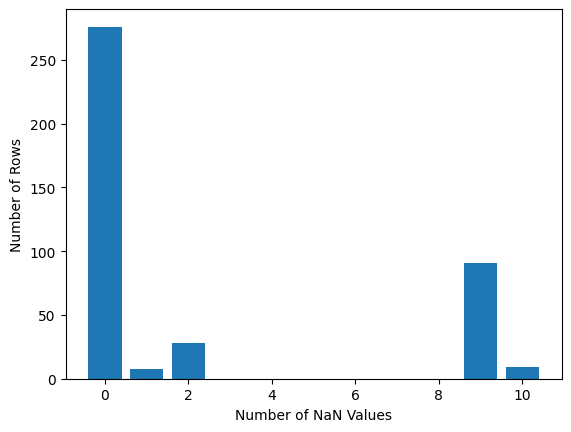

In [20]:
df['nan_count'] = df.isna().sum(axis=1)
grouped = df.groupby(['nan_count']).count()
plt.bar(grouped.index, grouped['ID'])
plt.xlabel('Number of NaN Values')
plt.ylabel('Number of Rows')

### Check rows with certain amount of nan

In [21]:
df[df['nan_count'] == 9]

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,nan_count
313,314,3561,D,NaN,23741,F,NaN,NaN,NaN,S,...,NaN,3.04,NaN,NaN,NaN,NaN,331.0,12.1,4.0,9
314,315,2844,C,NaN,19724,F,NaN,NaN,NaN,N,...,NaN,4.03,NaN,NaN,NaN,NaN,226.0,9.8,4.0,9
317,318,1680,C,NaN,15706,F,NaN,NaN,NaN,N,...,NaN,3.68,NaN,NaN,NaN,NaN,306.0,9.5,2.0,9
319,320,2403,C,NaN,16071,F,NaN,NaN,NaN,S,...,NaN,3.81,NaN,NaN,NaN,NaN,226.0,10.5,3.0,9
320,321,1170,C,NaN,22280,M,NaN,NaN,NaN,S,...,NaN,3.41,NaN,NaN,NaN,NaN,259.0,10.9,4.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,...,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0,9
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,...,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0,9
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,...,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0,9
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,...,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0,9


We see that the null value most often occurs for a given attribute, so we decide to create separate data frames

# #TODO Nie wiem czego chciałęś usuwać te dane wieć wykomentowałem na chwile obecną 


In [22]:
#df.drop(df[df['Prothrombin'].isna()].index, inplace=True)
#df.drop(df[df['Platelets'].isna()].index, inplace=True)

### Preparing a two data frames one for records that consider all atribuites and one that consider only choosen fields

In [23]:
detailed_medical_data = df[df.isna().sum(axis=1) < 4]
null_counts = detailed_medical_data.isna().sum()

for column, null_count in null_counts.items():
    if(null_count!=0):
        print(f"Column '{column}': {null_count} nulls")

Column 'Cholesterol': 28 nulls
Column 'Copper': 2 nulls
Column 'Tryglicerides': 30 nulls
Column 'Platelets': 4 nulls


In [24]:
null_counts = df.isna().sum()

for column, null_count in null_counts.items():
    if(null_count!=0):
        print(f"Column '{column}': {null_count} nulls")

Column 'Drug': 100 nulls
Column 'Ascites': 100 nulls
Column 'Hepatomegaly': 100 nulls
Column 'Spiders': 100 nulls
Column 'Cholesterol': 128 nulls
Column 'Copper': 102 nulls
Column 'Alk_Phos': 100 nulls
Column 'SGOT': 100 nulls
Column 'Tryglicerides': 130 nulls
Column 'Platelets': 11 nulls
Column 'Prothrombin': 2 nulls


In [25]:
columns_with_few_nulls = null_counts[null_counts < 100].index
basic_medical_data = df[columns_with_few_nulls]
null_counts = basic_medical_data.isna().sum()

for column, null_count in null_counts.items():
    if(null_count!=0):
        print(f"Column '{column}': {null_count} nulls")

Column 'Platelets': 11 nulls
Column 'Prothrombin': 2 nulls


# #TODO decide if we wanna delete rows with nulls or leave it and put their average values -> current approach overriding with average


In [26]:
def fill_nulls_with_mean(df):
    df = df.copy()
    for column in df.columns:
        if df[column].dtype in [np.float64, np.int64] and df[column].isnull().sum() > 0:
            df.loc[:, column] = df[column].fillna(df[column].mean())
    return df

In [27]:
basic_medical_data = fill_nulls_with_mean(basic_medical_data).drop(columns=['nan_count'])
detailed_medical_data = fill_nulls_with_mean(detailed_medical_data).drop(columns=['nan_count'])

### After that stage we have two dataframes basic_medical_data and detailed_medical_data ready for analysis

# Exploratory analysis


## Attribute variability

In [28]:
basic_medical_data.head()

,ID,N_Days,Status,Age,Sex,Edema,Bilirubin,Albumin,Platelets,Prothrombin,Stage
0,1,400,D,21464,F,Y,14.5,2.60,190.0,12.2,4.0
1,2,4500,C,20617,F,N,1.1,4.14,221.0,10.6,3.0
2,3,1012,D,25594,M,S,1.4,3.48,151.0,12.0,4.0
3,4,1925,D,19994,F,S,1.8,2.54,183.0,10.3,4.0
4,5,1504,CL,13918,F,N,3.4,3.53,136.0,10.9,3.0


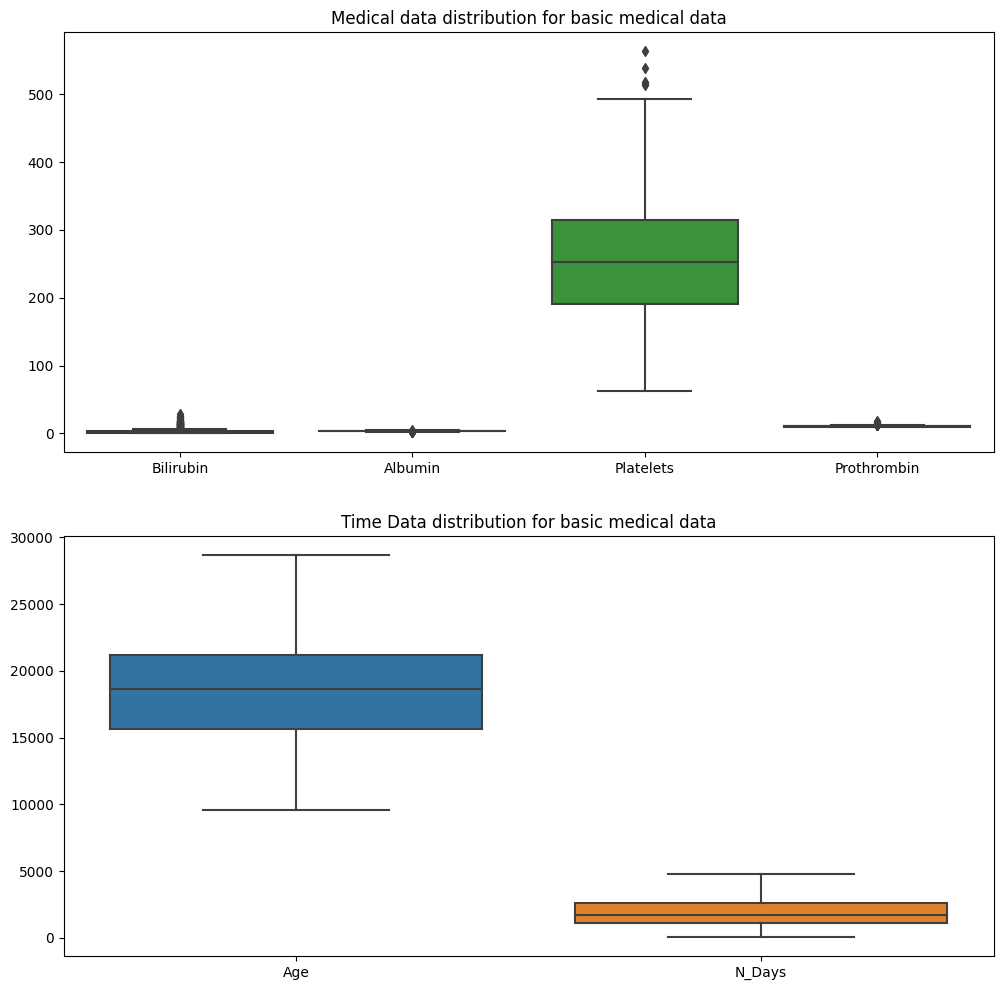

In [29]:
medical_data  = basic_medical_data.drop(columns=['ID','N_Days','Age','Stage'])

plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.boxplot(data=medical_data).set_title("Medical data distribution for basic medical data")

time_data = basic_medical_data[['Age', 'N_Days']]
plt.subplot(2,1,2)
sns.boxplot(data=time_data).set_title("Time Data distribution for basic medical data")
plt.show()

### The above graphs present the variability of the data. 
### In the first graph, we see medical data, while in the second graph, we observe time-related data, showing the age of the patients and the number of days (N_days).
### We can see that the most variable attribute categorized as medical is Platelets.

In [30]:
detailed_medical_data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


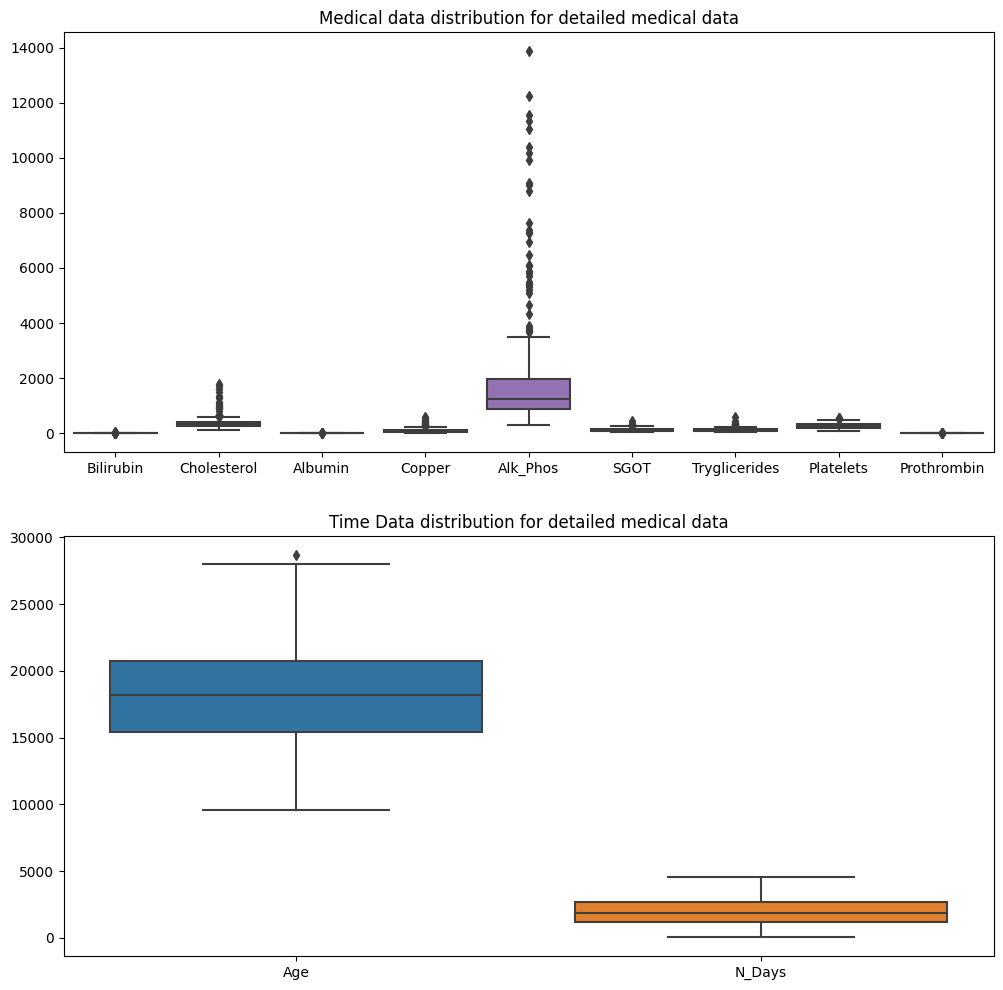

In [31]:
medical_data  = detailed_medical_data.drop(columns=['ID','N_Days','Age','Stage'])

plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.boxplot(data=medical_data).set_title("Medical data distribution for detailed medical data")

time_data = detailed_medical_data[['Age', 'N_Days']]
plt.subplot(2,1,2)
sns.boxplot(data=time_data).set_title("Time Data distribution for detailed medical data")
plt.show()

### The above graphs present the variability of the data. 
### In the first graph, we see medical data, while in the second graph, we observe time-related data, showing the age of the patients and the number of days (N_days).
### We can see that the most variable attribute categorized as medical is Alk_Phos.

## Degree of correlation

### basic medical data

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

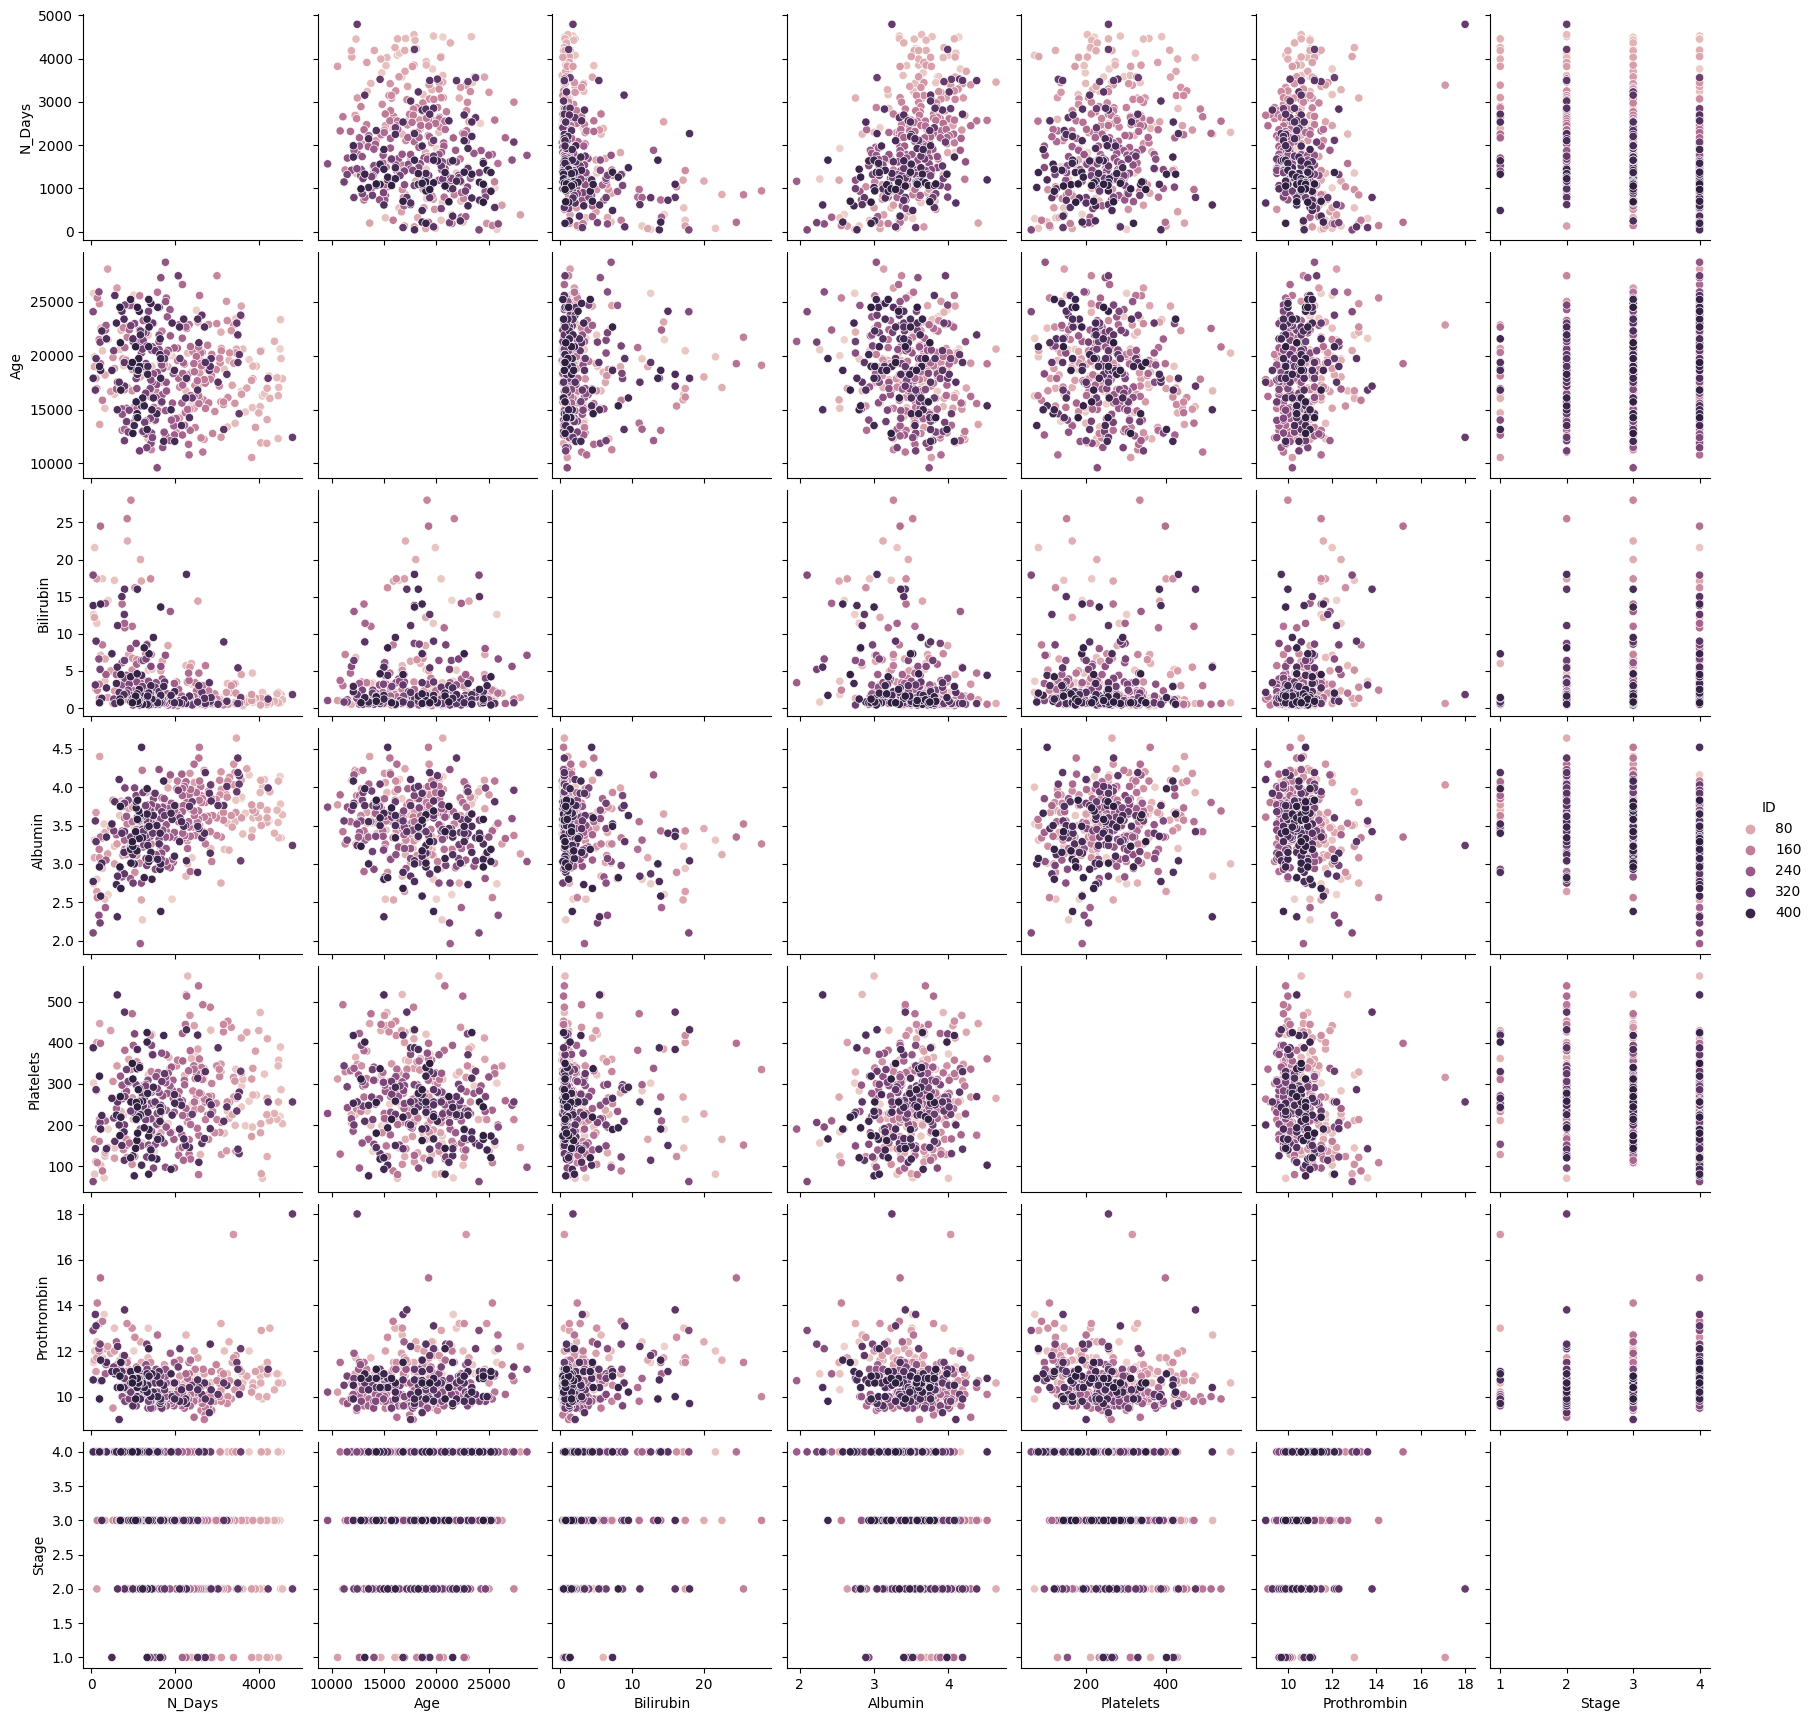

In [58]:
sns.pairplot(basic_medical_data, hue = 'ID', kind = 'scatter')
plt.show()

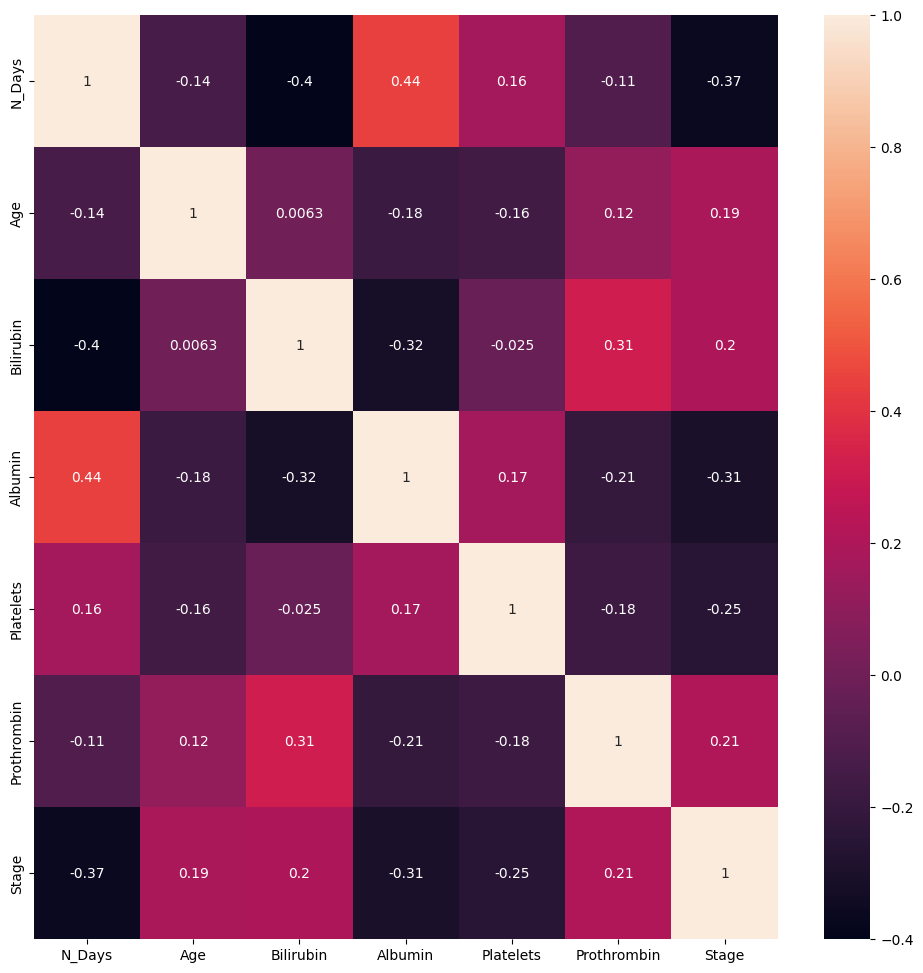

In [67]:
numeric_data = basic_medical_data.select_dtypes(include=[np.number]).drop(columns=['ID'])

plt.figure(figsize=(12, 12), dpi=100)
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()


### Detailed medical data

In [ ]:
sns.pairplot(detailed_medical_data, hue = 'ID', kind = 'scatter')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

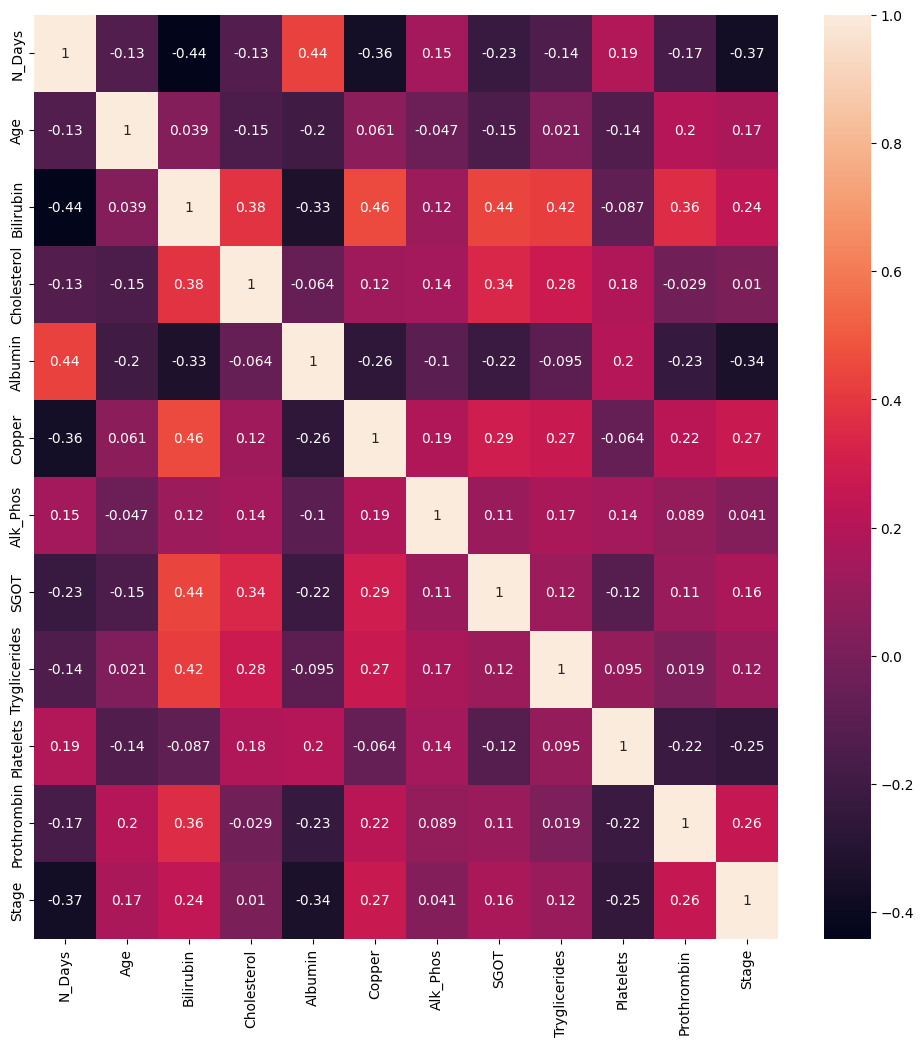

In [68]:
numeric_data = detailed_medical_data.select_dtypes(include=[np.number]).drop(columns=['ID'])

plt.figure(figsize=(12, 12), dpi=100)
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

# #TODO ^^^ Wnioski do tego i usunąć ten Warrning

# NAZWA NASTEPNEGO STAGEA

Na wybranym zbiorze danych należy wykonać analizę eksploracyjną (analogicznie do tego co robiliście Państwo na sprawdzianie) oraz wybrane zadanie uczenia maszynowego, przetwarzania obrazów lub tekstu (klasyfikację, regresję, grupowanie, segmentację itp). Zadanie drugie powinno zawierać element porównawczy przynajmniej dwóch meto/wariantów metody (np. z różnymi parametrami) z analizą wyników (który wariant jest lepszy/gorszy. dlaczego, itp)